In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,mean_absolute_error,roc_auc_score

In [30]:
import os
os.listdir()

['breast-cancer.csv', 'nb.ipynb']

In [31]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
df = df.iloc[:,1:32]
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [33]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

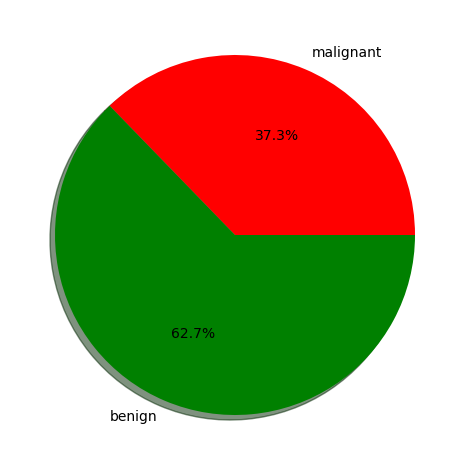

In [35]:
malignant = df[df['diagnosis'] == 'M'].shape[0]
benign = df[df['diagnosis'] == 'B'].shape[0]

class_ = [malignant,benign]
label = ['malignant','benign']

plt.pie(class_,labels = label,shadow = True,autopct = '%1.1f%%',colors=['red','green'])
plt.tight_layout()
plt.show()

In [36]:
X = df.iloc[:,1:32]
y = df.iloc[:,0]

In [37]:
X.tail(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [38]:
y.tail(3)

566    M
567    M
568    B
Name: diagnosis, dtype: object

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [40]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [41]:
corr = X_train.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.316083,0.998185,0.987094,0.164226,0.508985,0.669625,0.823662,0.130193,-0.330992,0.687831,-0.133134,0.684132,0.736629,-0.233293,0.174817,0.134351,0.337090,-0.131112,-0.050336,0.969537,0.281647,0.966220,0.941185,0.116935,0.403744,0.511501,0.736397,0.149669,-0.004484
texture_mean,0.316083,1.000000,0.322445,0.318626,-0.023107,0.241977,0.298975,0.292473,0.064376,-0.071964,0.274250,0.391945,0.279962,0.258296,0.005236,0.187780,0.115727,0.138461,-0.011331,0.045517,0.349677,0.908182,0.354636,0.348051,0.093454,0.273151,0.298302,0.289088,0.098803,0.115940
perimeter_mean,0.998185,0.322445,1.000000,0.986692,0.197597,0.555299,0.705993,0.850247,0.161548,-0.286012,0.699386,-0.122660,0.700160,0.745369,-0.212220,0.216026,0.164918,0.367159,-0.113737,-0.016077,0.969520,0.288406,0.970507,0.941920,0.145972,0.442236,0.545424,0.762361,0.171204,0.035518
area_mean,0.987094,0.318626,0.986692,1.000000,0.170459,0.500276,0.679675,0.823160,0.131129,-0.302548,0.741652,-0.095706,0.739008,0.802692,-0.173831,0.182002,0.152064,0.334977,-0.097331,-0.029255,0.961717,0.276386,0.959382,0.958527,0.120212,0.380076,0.498019,0.712975,0.126243,-0.008425
smoothness_mean,0.164226,-0.023107,0.197597,0.170459,1.000000,0.643792,0.503715,0.540170,0.536098,0.569111,0.291174,0.078002,0.281436,0.237709,0.361200,0.296529,0.219063,0.371415,0.190091,0.277729,0.202340,0.039730,0.222953,0.196480,0.800811,0.454826,0.418035,0.491856,0.374436,0.487641
compactness_mean,0.508985,0.241977,0.555299,0.500276,0.643792,1.000000,0.879782,0.832933,0.583548,0.540311,0.490794,0.037658,0.523968,0.448349,0.164984,0.726166,0.534107,0.641033,0.188297,0.506778,0.537510,0.257121,0.583536,0.511644,0.577326,0.865480,0.818573,0.825494,0.501795,0.685937
concavity_mean,0.669625,0.298975,0.705993,0.679675,0.503715,0.879782,1.000000,0.914627,0.477989,0.326375,0.630715,0.083288,0.648869,0.611714,0.113273,0.657862,0.667334,0.689313,0.148760,0.471887,0.679315,0.299400,0.713638,0.668894,0.442474,0.735011,0.880653,0.856157,0.387143,0.506538
concave points_mean,0.823662,0.292473,0.850247,0.823160,0.540170,0.832933,0.914627,1.000000,0.443281,0.143624,0.698765,0.016334,0.706920,0.684406,0.039861,0.466464,0.386527,0.600496,0.066280,0.257497,0.829558,0.293345,0.852132,0.808452,0.447236,0.654748,0.739295,0.906312,0.358796,0.354534
symmetry_mean,0.130193,0.064376,0.161548,0.131129,0.536098,0.583548,0.477989,0.443281,1.000000,0.460547,0.272369,0.116087,0.267812,0.195215,0.239717,0.421014,0.326318,0.408775,0.443154,0.350194,0.161466,0.075811,0.188754,0.152443,0.410912,0.454890,0.412594,0.418307,0.688489,0.429271
fractal_dimension_mean,-0.330992,-0.071964,-0.286012,-0.302548,0.569111,0.540311,0.326375,0.143624,0.460547,1.000000,-0.037154,0.184162,-0.012570,-0.116853,0.444301,0.556838,0.469985,0.357160,0.333950,0.687009,-0.276891,-0.037746,-0.237261,-0.254045,0.517432,0.451716,0.352917,0.168906,0.329159,0.771562


c:\Users\sunci\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

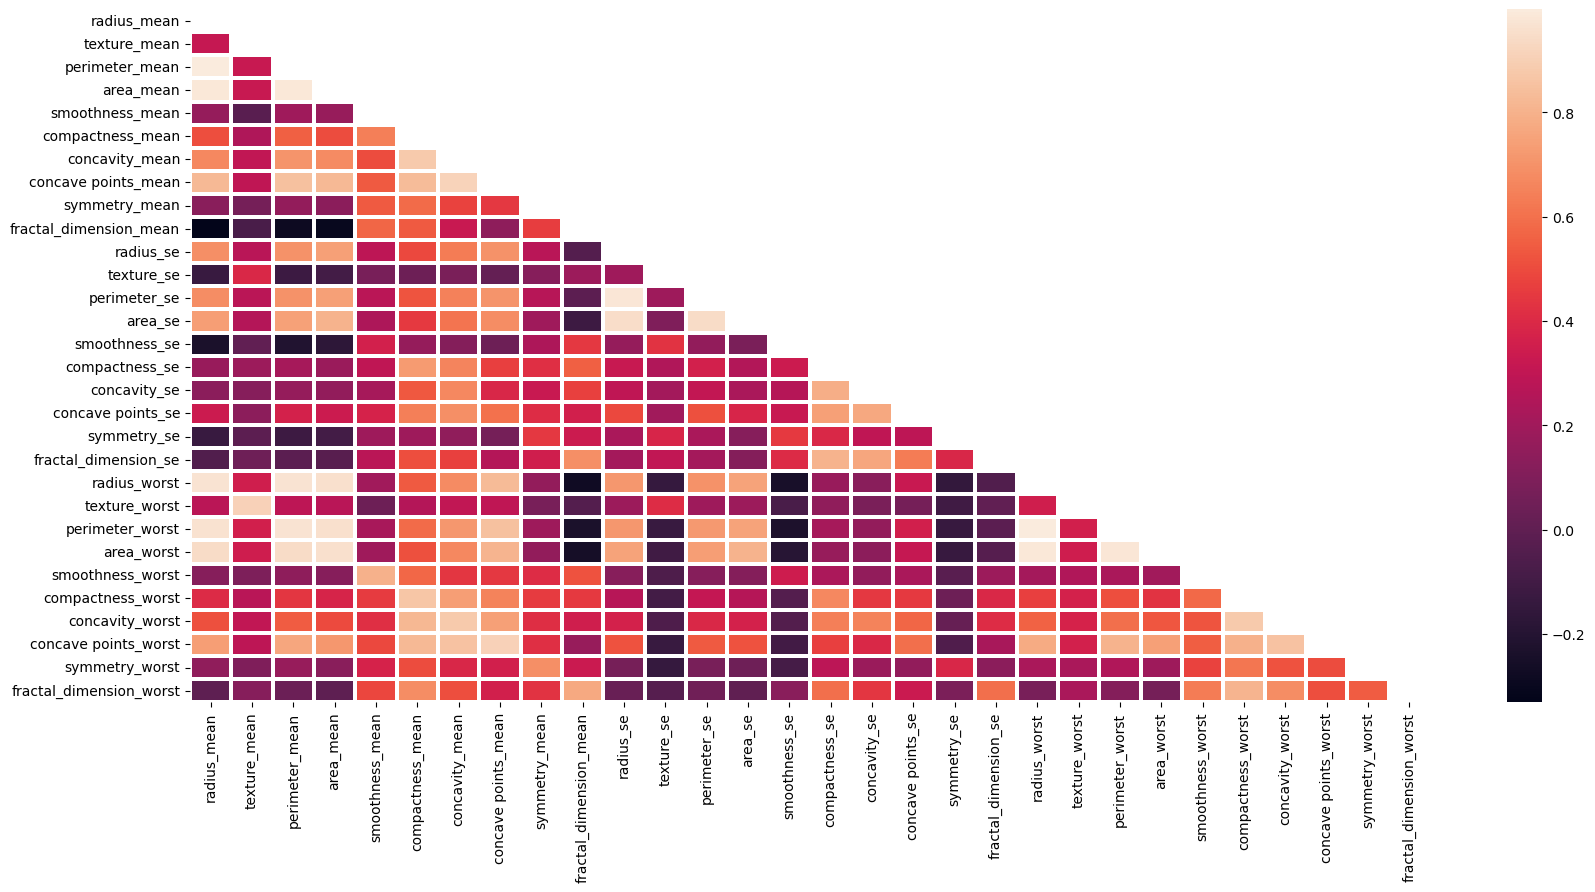

In [42]:
plt.figure(figsize=(20, 9))
matrix = np.triu(corr)  # take lower correlation matrix
sns.heatmap(corr, mask=matrix, annot=True, linewidth=1.5)

In [43]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features = correlation(X,0.7)
len(set(corr_features))

20

In [45]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_se',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

In [46]:
X_train = X_train.drop(corr_features,axis = 1)
X_test = X_test.drop(corr_features,axis = 1)

In [47]:
X_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
338,10.05,17.53,0.10070,0.07326,0.1890,0.06331,2.0150,0.007803,0.02100,0.2894
427,10.80,21.98,0.08801,0.05743,0.2016,0.05977,1.6210,0.006543,0.01844,0.2965
406,16.14,14.86,0.09495,0.08501,0.1735,0.05875,0.6372,0.003958,0.01500,0.2778
96,12.18,17.84,0.10450,0.07057,0.1900,0.06635,1.5110,0.005433,0.02220,0.2227
490,12.25,22.44,0.08192,0.05200,0.1544,0.05976,1.1390,0.005096,0.01608,0.3100


In [50]:
LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
y_test = LE.fit_transform(y_test)
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [51]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.201756,0.329079,1.029198,0.864118,1.120328,1.553585,-0.515882,-0.559540,-0.424461,1.082033
1,-0.255558,1.467633,-0.616891,-1.016540,-0.695677,-1.002451,0.258826,-0.434915,-0.861714,-0.731316
2,-0.026193,-0.840768,-1.215402,-0.941988,-0.805295,-0.999514,-1.025150,-0.762670,-1.076677,-1.220809
3,0.041767,-0.236588,-2.223804,-1.013566,-0.637214,-0.999514,-0.999105,-1.349883,-1.159730,-0.426177
4,-0.306528,-0.176411,-0.477601,-1.301861,-1.251074,-0.592839,2.091230,-0.933413,0.755388,-1.457609


In [52]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [53]:
y_pred = nb.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0])

In [57]:
acc = accuracy_score(y_test,y_pred)
acc

0.8771929824561403